In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics

from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

from scipy import stats as stats

pd.set_option("display.max_columns", None)

%matplotlib inline

In [2]:
df = pd.read_csv("../../data/kc_house_data.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [5]:
def ohe(df, *cols):
    temp_df = df
    for col in cols:
        encoder = OneHotEncoder(handle_unknown="ignore")
        fitted_arr = encoder.fit_transform(temp_df[[col]]).toarray()
        col_names = [f"{col}_{f}" for f in encoder.get_feature_names()]
        encoded_values = pd.DataFrame(fitted_arr, columns=col_names)
        temp_df = temp_df.join(encoded_values)
    return temp_df

In [6]:
ohe_df = ohe(df, "grade", "condition", "zipcode")

In [7]:
list(ohe_df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'grade_x0_10 Very Good',
 'grade_x0_11 Excellent',
 'grade_x0_12 Luxury',
 'grade_x0_13 Mansion',
 'grade_x0_3 Poor',
 'grade_x0_4 Low',
 'grade_x0_5 Fair',
 'grade_x0_6 Low Average',
 'grade_x0_7 Average',
 'grade_x0_8 Good',
 'grade_x0_9 Better',
 'condition_x0_Average',
 'condition_x0_Fair',
 'condition_x0_Good',
 'condition_x0_Poor',
 'condition_x0_Very Good',
 'zipcode_x0_98001',
 'zipcode_x0_98002',
 'zipcode_x0_98003',
 'zipcode_x0_98004',
 'zipcode_x0_98005',
 'zipcode_x0_98006',
 'zipcode_x0_98007',
 'zipcode_x0_98008',
 'zipcode_x0_98010',
 'zipcode_x0_98011',
 'zipcode_x0_98014',
 'zipcode_x0_98019',
 'zipcode_x0_98022',
 'zipcode_x0_98023',
 'zipcode_x0_98024',
 'zipcode_x0_98027',
 'zipcode_x0_98028',
 'zipcode

In [8]:
ohe_df = ohe_df.drop(columns=['id','sqft_basement','waterfront','sqft_lot','floors','sqft_above','date','yr_renovated','lat','long','sqft_lot15','view','condition','grade','zipcode'])

In [9]:
list(ohe_df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'yr_built',
 'sqft_living15',
 'grade_x0_10 Very Good',
 'grade_x0_11 Excellent',
 'grade_x0_12 Luxury',
 'grade_x0_13 Mansion',
 'grade_x0_3 Poor',
 'grade_x0_4 Low',
 'grade_x0_5 Fair',
 'grade_x0_6 Low Average',
 'grade_x0_7 Average',
 'grade_x0_8 Good',
 'grade_x0_9 Better',
 'condition_x0_Average',
 'condition_x0_Fair',
 'condition_x0_Good',
 'condition_x0_Poor',
 'condition_x0_Very Good',
 'zipcode_x0_98001',
 'zipcode_x0_98002',
 'zipcode_x0_98003',
 'zipcode_x0_98004',
 'zipcode_x0_98005',
 'zipcode_x0_98006',
 'zipcode_x0_98007',
 'zipcode_x0_98008',
 'zipcode_x0_98010',
 'zipcode_x0_98011',
 'zipcode_x0_98014',
 'zipcode_x0_98019',
 'zipcode_x0_98022',
 'zipcode_x0_98023',
 'zipcode_x0_98024',
 'zipcode_x0_98027',
 'zipcode_x0_98028',
 'zipcode_x0_98029',
 'zipcode_x0_98030',
 'zipcode_x0_98031',
 'zipcode_x0_98032',
 'zipcode_x0_98033',
 'zipcode_x0_98034',
 'zipcode_x0_98038',
 'zipcode_x0_98039',
 'zipcode_x0_98040',
 '

In [10]:
#bin data by IQR (price)

z, bins = pd.qcut(ohe_df.price, 4, retbins=True)

In [11]:
z

0        (77999.999, 322000.0]
1         (450000.0, 645000.0]
2        (77999.999, 322000.0]
3         (450000.0, 645000.0]
4         (450000.0, 645000.0]
                 ...          
21592     (322000.0, 450000.0]
21593     (322000.0, 450000.0]
21594     (322000.0, 450000.0]
21595     (322000.0, 450000.0]
21596     (322000.0, 450000.0]
Name: price, Length: 21597, dtype: category
Categories (4, interval[float64]): [(77999.999, 322000.0] < (322000.0, 450000.0] < (450000.0, 645000.0] < (645000.0, 7700000.0]]

In [12]:
#data subsets

top_25_df= ohe_df[ohe_df['price']> 645000.0]

middle_50_df = ohe_df[(322000.0 < ohe_df['price'] ) & ( ohe_df['price'] <=645000.0)]

bottom_25_df = ohe_df[ohe_df['price'] <= 322000.0]

In [13]:
top_25_df['price'].describe()

count    5.371000e+03
mean     9.878394e+05
std      4.771142e+05
min      6.455000e+05
25%      7.235000e+05
50%      8.260000e+05
75%      1.050000e+06
max      7.700000e+06
Name: price, dtype: float64

In [14]:
middle_50_df['price'].describe()

count     10820.000000
mean     462294.906839
std       90152.648467
min      322200.000000
25%      385000.000000
50%      450000.000000
75%      536000.000000
max      645000.000000
Name: price, dtype: float64

In [15]:
bottom_25_df['price'].describe()

count      5406.000000
mean     251769.994451
std       48252.198518
min       78000.000000
25%      220000.000000
50%      259000.000000
75%      290000.000000
max      322000.000000
Name: price, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
#High-Income-Model 
top_X = top_25_df.drop(columns='price')
top_y = top_25_df['price']
#train_test_split
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(
top_X, top_y, test_size=0.33, random_state=42)
#scaler 
scaler.fit(top_X_train)
top_X_train = scaler.transform(top_X_train)
top_X_test = scaler.transform(top_X_test)
#model
simple_top_sk =LinearRegression()
top_model = simple_top_sk.fit(top_X_train,top_y_train)
#score
top_train_score = top_model.score(top_X_train, top_y_train)
top_test_score = top_model.score(top_X_test, top_y_test)
top_train_score,top_test_score

(0.6692058451403207, 0.6456217451934646)

In [19]:
#High-Income-Model preds
top_train_preds = top_model.predict(top_X_train)
top_test_preds = top_model.predict(top_X_test)
r2_score(top_y_train, top_train_preds),r2_score(top_y_test,top_test_preds)


(0.6692058451403207, 0.6456217451934646)

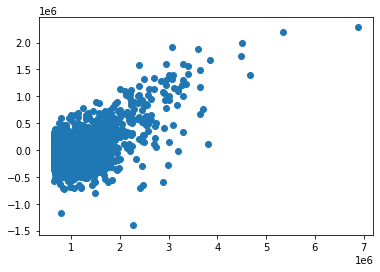

In [30]:
#residuals
top_train_residuals = top_y_train - top_train_preds
plt.scatter(top_y_train,top_train_residuals);

In [23]:
#TrainVSTestMetrics
#TrainingMetrics
print("Training Metrics:")
# R2
print(f"R2: {r2_score(top_y_train, top_train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(top_y_train, top_train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(top_y_train, top_train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(top_y_train, top_train_preds, squared=False):.3f}")
#TrainingMetrics
print("Testing Metrics:")
# R2
print(f"R2: {r2_score(top_y_test, top_test_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(top_y_test, top_test_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(top_y_test, top_test_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(top_y_test, top_test_preds, squared=False):.3f}")

Training Metrics:
R2: 0.669
Mean Absolute Error: 169596.004
Mean Squared Error: 68585366703.960
Root Mean Squared Error: 261888.080
Testing Metrics:
R2: 0.646
Mean Absolute Error: 183858.795
Mean Squared Error: 95083837750.592
Root Mean Squared Error: 308356.673


In [25]:
#Mid-Income-Model
mid_X = ohe_df.drop (columns='price')
mid_y =ohe_df['price']

#train_test_split
mid_X_train, mid_X_test, mid_y_train, mid_y_test = train_test_split(
mid_X, mid_y, test_size=0.33, random_state=42)
#scaler 
scaler.fit(mid_X_train)
mid_X_train = scaler.transform(mid_X_train)
mid_X_test = scaler.transform(mid_X_test)
#model
simple_mid_sk =LinearRegression()
mid_model = simple_mid_sk.fit(mid_X_train,mid_y_train)
#score
mid_train_score = mid_model.score(mid_X_train, mid_y_train)
mid_test_score = mid_model.score(mid_X_test, mid_y_test)
mid_train_score,mid_test_score

(0.7948034556295516, 0.7828687005512688)

In [27]:
#Mid-Income-Model preds
mid_train_preds = mid_model.predict(mid_X_train)
mid_test_preds = mid_model.predict(mid_X_test)
r2_score(mid_y_train, mid_train_preds),r2_score(mid_y_test,mid_test_preds)

(0.7948034556295516, 0.7828687005512688)

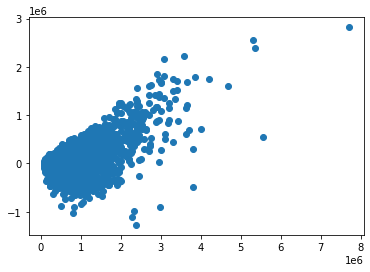

In [29]:
#residuals
mid_train_residuals = mid_y_train - mid_train_preds
plt.scatter(mid_y_train,mid_train_residuals);

In [31]:
#TrainVSTestMetrics
#TrainingMetrics
print("Training Metrics:")
# R2
print(f"R2: {r2_score(mid_y_train, mid_train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(mid_y_train, mid_train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(mid_y_train, mid_train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(mid_y_train, mid_train_preds, squared=False):.3f}")
#TrainingMetrics
print("Testing Metrics:")
# R2
print(f"R2: {r2_score(mid_y_test, mid_test_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(mid_y_test, mid_test_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(mid_y_test, mid_test_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(mid_y_test, mid_test_preds, squared=False):.3f}")

Training Metrics:
R2: 0.795
Mean Absolute Error: 96780.136
Mean Squared Error: 28116091935.407
Root Mean Squared Error: 167678.537
Testing Metrics:
R2: 0.783
Mean Absolute Error: 95479.064
Mean Squared Error: 28387147503.963
Root Mean Squared Error: 168484.858


In [32]:
#Low-Income-Model
bot_X =ohe_df.drop (columns='price')
bot_y =ohe_df['price']

#train_test_split
bot_X_train, bot_X_test, bot_y_train, bot_y_test = train_test_split(
bot_X, bot_y, test_size=0.33, random_state=42)

#scaler 
scaler.fit(bot_X_train)
bot_X_train = scaler.transform(bot_X_train)
bot_X_test = scaler.transform(bot_X_test)
#model
simple_bot_sk =LinearRegression()
bot_model = simple_bot_sk.fit(bot_X_train,bot_y_train)
#score
bot_train_score = bot_model.score(bot_X_train, bot_y_train)
bot_test_score = bot_model.score(bot_X_test, bot_y_test)
bot_train_score,bot_test_score


(0.7948034556295516, 0.7828687005512688)

In [33]:
#Low-income-Model preds
bot_train_preds = bot_model.predict(bot_X_train)
bot_test_preds = bot_model.predict(bot_X_test)
r2_score(bot_y_train, bot_train_preds),r2_score(bot_y_test,bot_test_preds)

(0.7948034556295516, 0.7828687005512688)

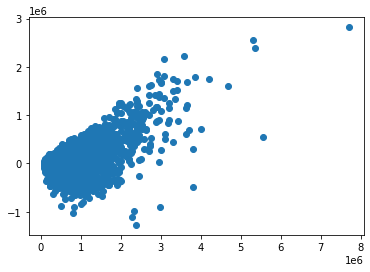

In [34]:
#residuals
bot_train_residuals = bot_y_train - bot_train_preds
plt.scatter(bot_y_train,bot_train_residuals);

In [35]:
#TrainVSTestMetrics
#TrainingMetrics
print("Training Metrics:")
# R2
print(f"R2: {r2_score(bot_y_train, bot_train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(bot_y_train, bot_train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(bot_y_train, bot_train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(bot_y_train, bot_train_preds, squared=False):.3f}")
#TrainingMetrics
print("Testing Metrics:")
# R2
print(f"R2: {r2_score(bot_y_test, bot_test_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(bot_y_test, bot_test_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(bot_y_test, bot_test_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(bot_y_test, bot_test_preds, squared=False):.3f}")

Training Metrics:
R2: 0.795
Mean Absolute Error: 96780.136
Mean Squared Error: 28116091935.407
Root Mean Squared Error: 167678.537
Testing Metrics:
R2: 0.783
Mean Absolute Error: 95479.064
Mean Squared Error: 28387147503.963
Root Mean Squared Error: 168484.858
